In [1]:
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import matplotlib.ticker as ticker

Load in raw dataset as a dataframe.

In [2]:
df = pd.read_csv('C:/Users/User/Desktop/gap year/internship -week 1/sales_data - Sheet1.csv')
df

Plotting raw dataset with corrections highlighted

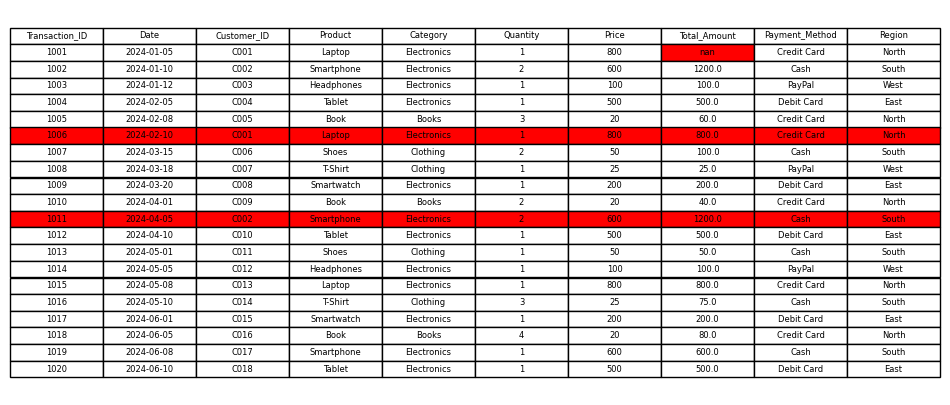

In [7]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.axis('off')
tbl = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

# Highlight cell (row 1, col 1, i.e. value 5)
tbl[(1, 7)].set_facecolor('red')
for i in range(10):
    tbl[(6, i)].set_facecolor('red')
    tbl[(11, i)].set_facecolor('red')
# Save image
plt.savefig('df_table.png', bbox_inches='tight', dpi=200)

In [12]:
df.drop(5, inplace=True)
df.drop(10, inplace=True)

In [14]:
df.to_csv('cleaned_sales_data.csv', index=False)

Load in cleaned dataset to avoid cleaning it everytime

In [5]:
df_cleaned = pd.read_csv('C:/Users/User/Desktop/gap year/internship -week 1/cleaned_sales_data.csv')

In [14]:
df_floats = pd.DataFrame(df_cleaned[['Quantity','Price', 'Total_Amount']])
df_floats.corr()

,Quantity,Price,Total_Amount
Quantity,1.000000,-0.447867,-0.268290
Price,-0.447867,1.000000,0.916645
Total_Amount,-0.268290,0.916645,1.000000


Generate month and season columns for later binning

In [7]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
def get_season(date):
    Y = date.year
    if pd.Timestamp(f'{Y}-03-21') <= date < pd.Timestamp(f'{Y}-06-21'):
        return 'Spring'
    elif pd.Timestamp(f'{Y}-06-21') <= date < pd.Timestamp(f'{Y}-09-23'):
        return 'Summer'
    elif pd.Timestamp(f'{Y}-09-23') <= date < pd.Timestamp(f'{Y}-12-21'):
        return 'Fall'
    else:
        return 'Winter'

df_cleaned['Season'] = df_cleaned['Date'].apply(get_season)

In [8]:
def get_month(date):
    m = date.month
    return m

df_cleaned['Month'] = df_cleaned['Date'].apply(get_month)

In [10]:
df_cleaned

,Transaction_ID,Date,Customer_ID,Product,Category,Quantity,Price,Total_Amount,Payment_Method,Region,Season,Month
0,1001,2024-01-05,C001,Laptop,Electronics,1,800,800.0,Credit Card,North,Winter,1
1,1002,2024-01-10,C002,Smartphone,Electronics,2,600,1200.0,Cash,South,Winter,1
2,1003,2024-01-12,C003,Headphones,Electronics,1,100,100.0,PayPal,West,Winter,1
3,1004,2024-02-05,C004,Tablet,Electronics,1,500,500.0,Debit Card,East,Winter,2
4,1005,2024-02-08,C005,Book,Books,3,20,60.0,Credit Card,North,Winter,2
5,1007,2024-03-15,C006,Shoes,Clothing,2,50,100.0,Cash,South,Winter,3
6,1008,2024-03-18,C007,T-Shirt,Clothing,1,25,25.0,PayPal,West,Winter,3
7,1009,2024-03-20,C008,Smartwatch,Electronics,1,200,200.0,Debit Card,East,Winter,3
8,1010,2024-04-01,C009,Book,Books,2,20,40.0,Credit Card,North,Spring,4
9,1012,2024-04-10,C010,Tablet,Electronics,1,500,500.0,Debit Card,East,Spring,4


Generating summary statistics from the cleaned dataset

In [34]:
mean_prices = df_cleaned.groupby('Category')['Quantity']
range_quant = mean_prices.max()-mean_prices.min()
range_quant

Category
Books          2
Clothing       2
Electronics    1
Name: Quantity, dtype: int64

In [35]:
mode_per_group = df_cleaned.groupby('Category')['Quantity'].apply(lambda x: x.mode().iloc[0])
mode_per_group

Category
Books          2
Clothing       1
Electronics    1
Name: Quantity, dtype: int64

Generating grouped data taking into account quantity for distribution visualisation

In [49]:
grouped_dist = df_cleaned.groupby(['Price', 'Category'])['Quantity'].sum().unstack().fillna(0)
grouped_dist = grouped_dist.reset_index()
grouped_long = grouped_dist.melt(
    id_vars=['Price'],
    value_vars=['Books', 'Clothing', 'Electronics'],
    var_name='Category',
    value_name='Quantity'
)

grouped_dist2 = df_cleaned.groupby(['Price', 'Payment_Method'])['Quantity'].sum().unstack().fillna(0)
grouped_dist2 = grouped_dist2.reset_index()
grouped_long2 = grouped_dist2.melt(
    id_vars=['Price'],
    value_vars=['Cash', 'Credit Card', 'Debit Card', 'PayPal'],
    var_name='Payment_Method',
    value_name='Quantity'
)

In [50]:
grouped_long = grouped_long.loc[~(grouped_long == 0).any(axis=1)]
grouped_long = grouped_long.iloc[::-1]
grouped_long2 = grouped_long2.loc[~(grouped_long2 == 0).any(axis=1)]
grouped_long2 = grouped_long2.iloc[::-1]

In [100]:
grouped_long['Quantity'].sum()

np.float64(28.0)

In [101]:
grouped_long

,Price,Category,Quantity
23,800,Electronics,2.0
22,600,Electronics,3.0
21,500,Electronics,3.0
20,200,Electronics,2.0
19,100,Electronics,2.0
10,50,Clothing,3.0
9,25,Clothing,4.0
0,20,Books,9.0


In [105]:
sum = 0
for i in grouped_long.index:
    sum += grouped_long['Price'][i] * grouped_long['Quantity'][i]
mean_price = sum / grouped_long['Quantity'].sum()

Plot of the distribution of sales by price and quantity

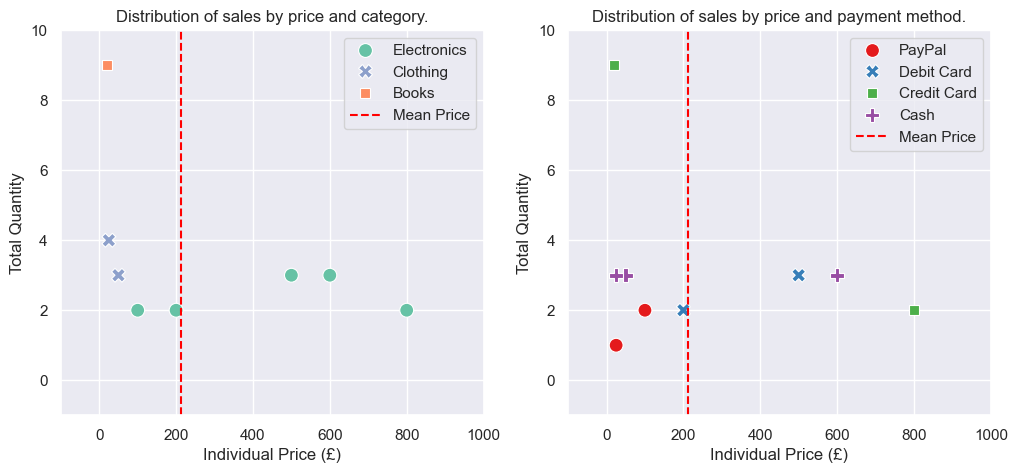

In [106]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5), sharey=False)
sns.set_theme()
color_map = {'Books' :'#fc8d62', 'Clothing':'#8da0cb', 'Electronics':'#66c2a5'}
sns.scatterplot(data=grouped_long, x='Price', y='Quantity', style='Category', s=100, hue='Category' , palette=color_map, ax=axs[0])
axs[1] = sns.scatterplot(data=grouped_long2, x='Price', y='Quantity', style='Payment_Method', s=100, hue='Payment_Method' , palette='Set1', ax=axs[1])

for ax in axs:
    ax.axvline(mean_price, color='red', linestyle='--', linewidth=1.5, label='Mean Price')
    ax.legend()
    ax.set_xlim([-100,1000])
    ax.set_ylim([-1, 10])

axs[0].set_title('Distribution of sales by price and category.')
axs[0].set_xlabel('Individual Price (£)')
axs[0].set_ylabel('Total Quantity')


axs[1].set_title('Distribution of sales by price and payment method.')
axs[1].set_xlabel('Individual Price (£)')
axs[1].set_ylabel('Total Quantity')


plt.savefig("price-quantity.png")

In [107]:
mean_price

np.float64(211.78571428571428)

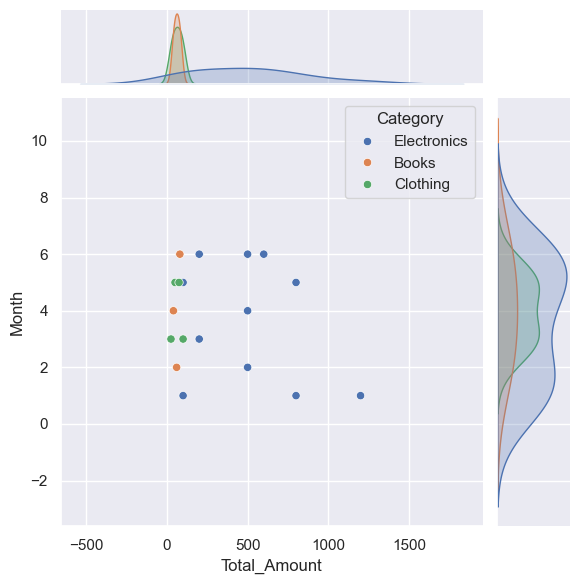

In [68]:
sns.jointplot(data=df_cleaned, x='Total_Amount', y='Month', hue='Category')

Binning by month for monthly distribution and grouping to take into account quantity again

In [40]:
monthly_totals = df_cleaned.groupby('Month')['Quantity'].sum().reset_index()

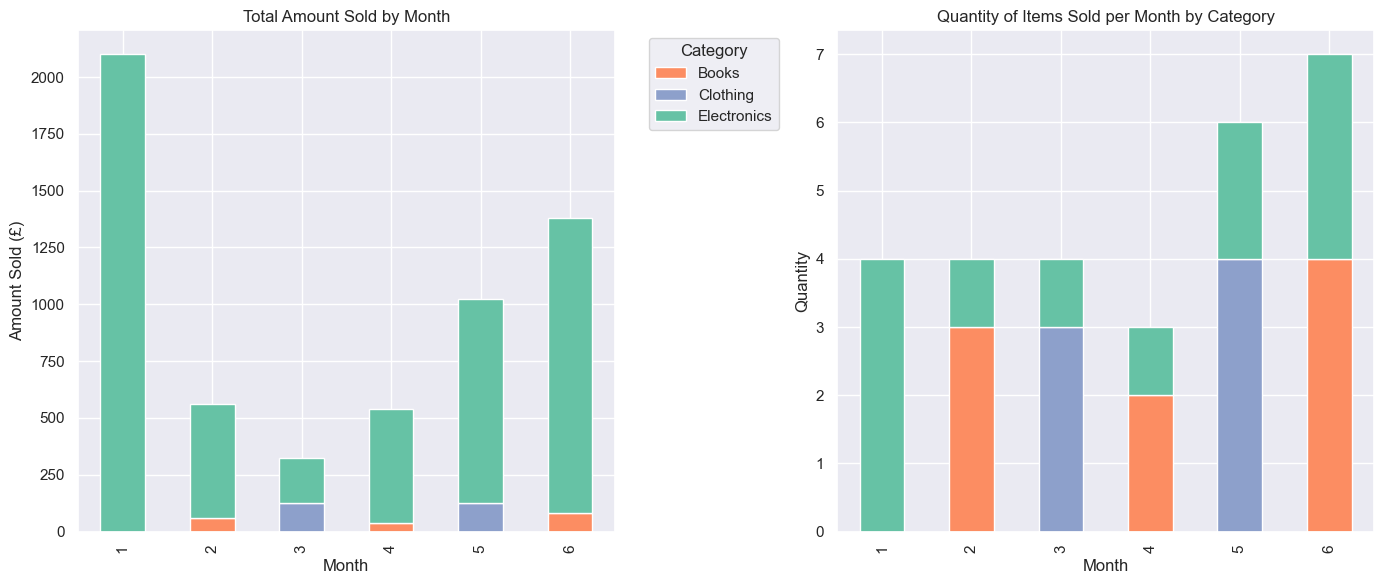

In [47]:
pivot_df2 = df_cleaned.pivot_table(index='Month', columns='Category', values='Quantity', aggfunc='sum').fillna(0)
pivot_df = df_cleaned.pivot_table(index='Month', columns='Category', values='Total_Amount', aggfunc='sum').fillna(0)

# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

colors = ['#fc8d62', '#8da0cb', '#66c2a5']  # Customize as needed
categories = pivot_df.columns.tolist()

pivot_df.plot(kind='bar', stacked=True, ax=axs[0], color=colors)
axs[0].set_title('Total Amount Sold by Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Amount Sold (£)')
axs[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Quantity
pivot_df2.plot(kind='bar', stacked=True, ax=axs[1], color=colors)
axs[1].set_title('Quantity of Items Sold per Month by Category')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('Quantity')
axs[1].legend().remove()  # Avoid duplicate legend

# Layout adjustment
plt.tight_layout()
plt.savefig("Monthly-Distribution.png")

Regional grouping and plots

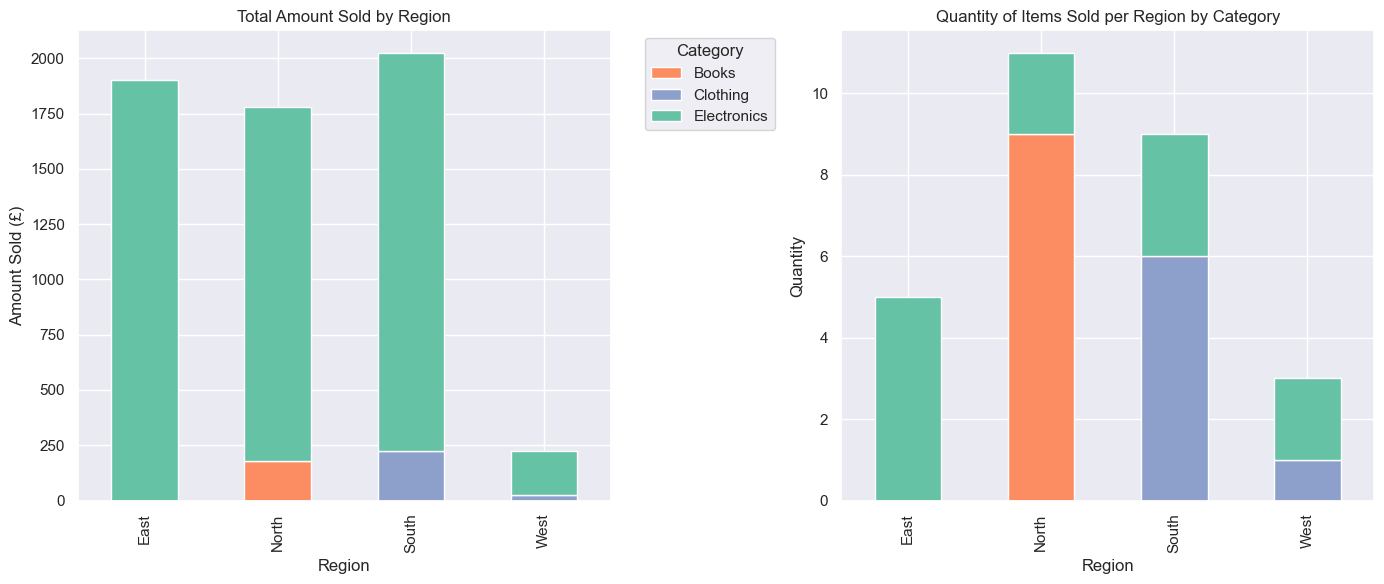

In [43]:
pivot_df2 = df_cleaned.pivot_table(index='Region', columns='Category', values='Quantity', aggfunc='sum').fillna(0)
pivot_df = df_cleaned.pivot_table(index='Region', columns='Category', values='Total_Amount', aggfunc='sum').fillna(0)
sns.set_theme()
# Create subplots: 1 row, 2 columns
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=False)

colors = ['#fc8d62', '#8da0cb', '#66c2a5']  # Customize as needed
categories = pivot_df.columns.tolist()

pivot_df.plot(kind='bar', stacked=True, ax=axs[0], color=colors)
axs[0].set_title('Total Amount Sold by Region')
axs[0].set_xlabel('Region')
axs[0].set_ylabel('Amount Sold (£)')
axs[0].legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Plot Quantity
pivot_df2.plot(kind='bar', stacked=True, ax=axs[1], color=colors)
axs[1].set_title('Quantity of Items Sold per Region by Category')
axs[1].set_xlabel('Region')
axs[1].set_ylabel('Quantity')
axs[1].legend().remove()  # Avoid duplicate legend

# Layout adjustment
plt.tight_layout()
plt.savefig("Regional-Distribution.png")

In [23]:
grouped = df_cleaned.groupby(['Region', 'Category'])['Amount'].sum().unstack().fillna(0)

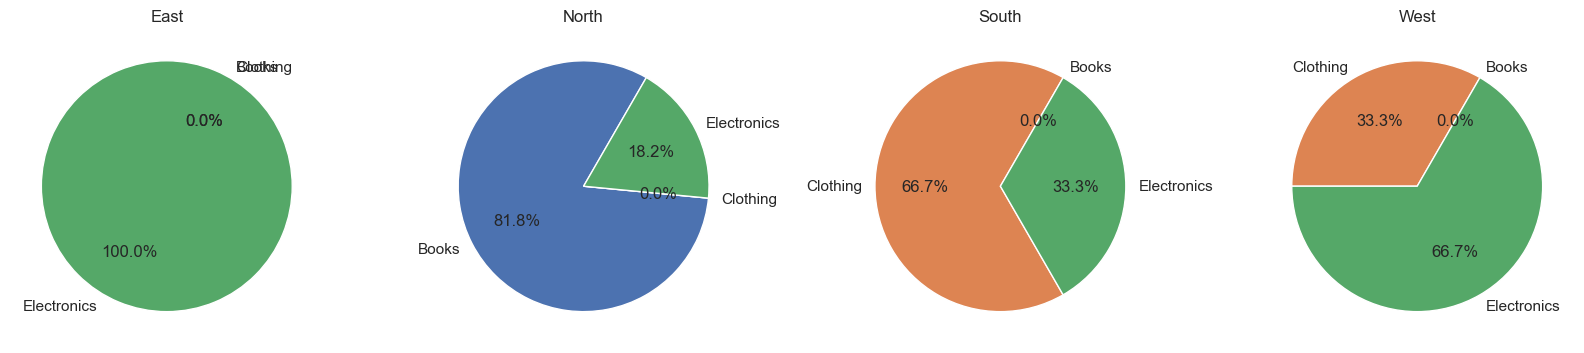

In [25]:
regions = grouped.index
categories = grouped.columns

fig, axs = plt.subplots(1, len(regions), figsize=(16, 6))

for i, region in enumerate(regions):
    axs[i].pie(grouped.loc[region], labels=categories, autopct='%1.1f%%', startangle=60)
    axs[i].set_title(region)

plt.tight_layout()
plt.show()

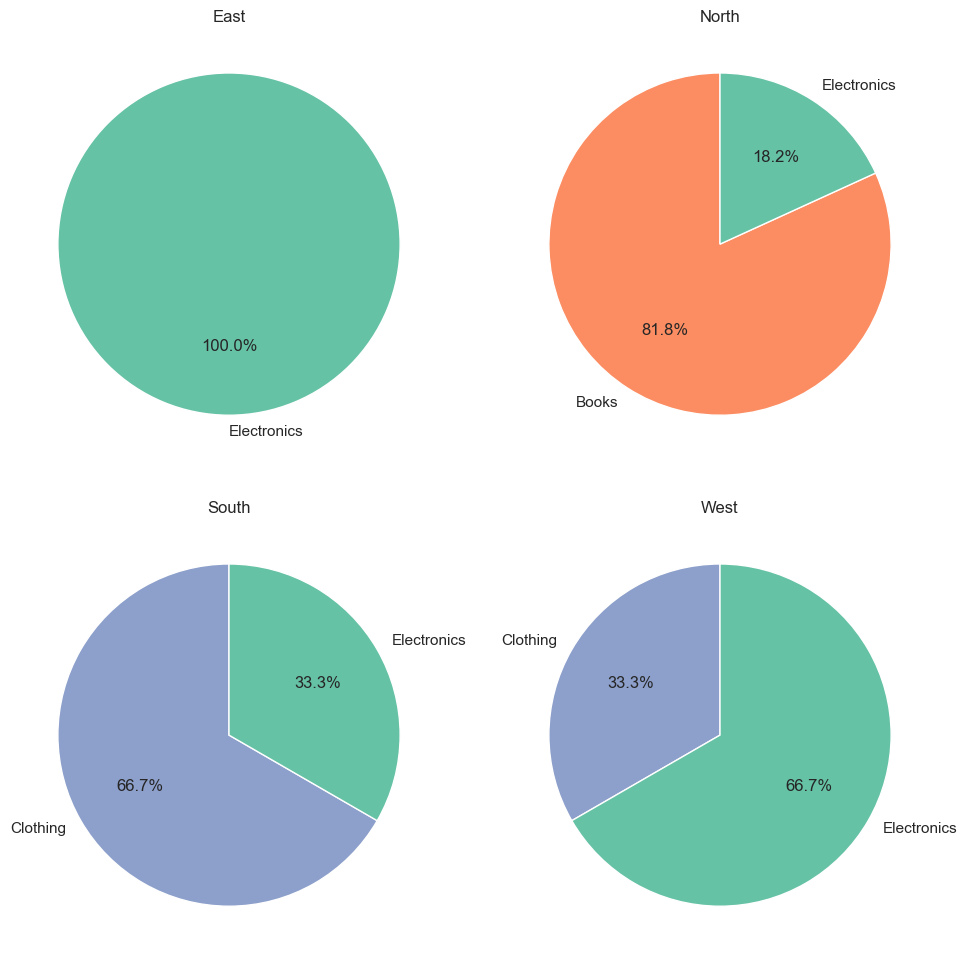

In [39]:
regions = grouped.index
categories = grouped.columns

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Flatten axes for easy iteration
axs = axs.flatten()

categories = grouped.columns.tolist()

# Choose a colormap and generate distinct colors
cmap = plt.get_cmap('Set2', len(categories))
color_map = {'Books' :'#fc8d62', 'Clothing':'#8da0cb', 'Electronics':'#66c2a5'}

for i, region in enumerate(regions):
    values = grouped.loc[region]
    
    # Filter out zero values to avoid labeling them
    non_zero = values[values > 0]
    labels = non_zero.index
    sizes = non_zero.values
    colors = [color_map[label] for label in labels]
    
    axs[i].pie(
        sizes,
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
        startangle=90,
        labeldistance=1.1,  # Move labels slightly outward
        colors=colors
    )
    axs[i].set_title(region)

plt.tight_layout()
plt.savefig("Quantity-region.png")

Product category grouping and plot

In [83]:
grouped2 = df_cleaned.groupby(['Category', 'Product'])['Total_Amount'].sum().unstack().fillna(0)

In [84]:
grouped2_quant = df_cleaned.groupby(['Category', 'Product'])['Quantity'].sum().unstack().fillna(0)

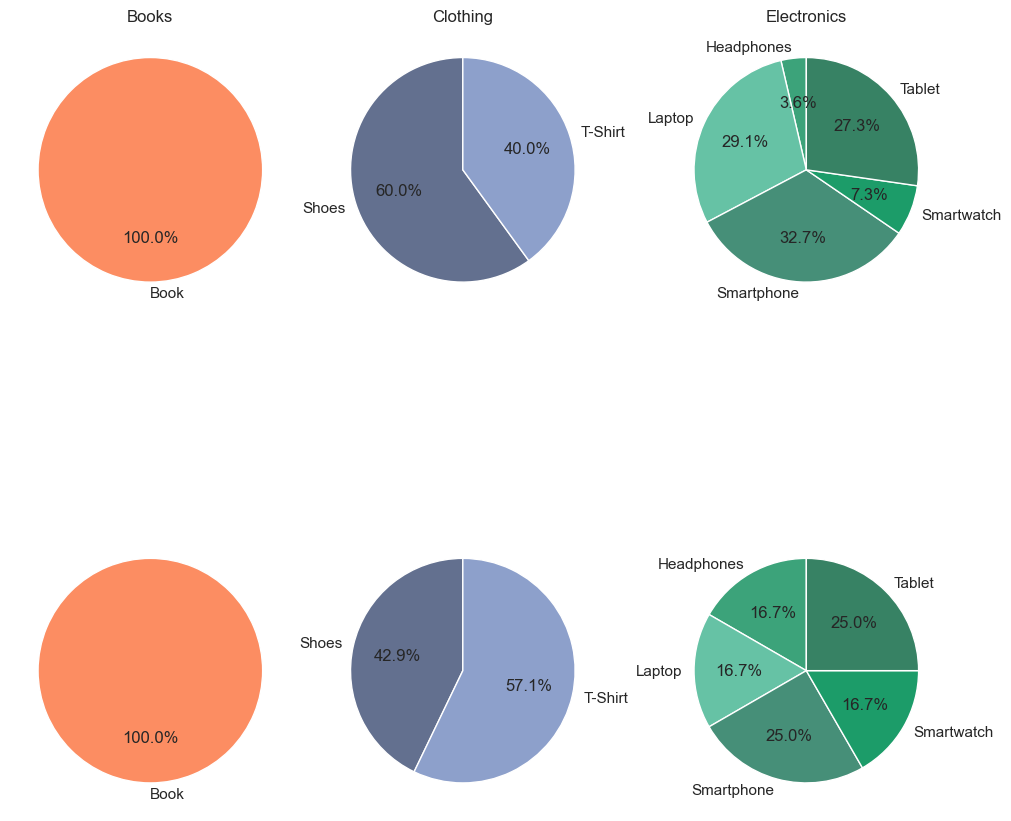

In [99]:
fig, axs = plt.subplots(2, 3, figsize=(10, 10), constrained_layout=True)

categories = grouped2.index
products = grouped2.columns.tolist()
products_quant = grouped2_quant.columns.tolist()

color_map = {'Book' :'#fc8d62', 'T-Shirt':'#8da0cb','Shoes':'#63708f', 'Laptop':'#66c2a5', 'Smartphone':'#468f78', 'Headphones':'#3ca37a', 'Tablet':'#378264', 'Smartwatch':'#1c9c69'}

for i, category in enumerate(categories):
    values = grouped2.loc[category]

    non_zero = values[values > 0]
    labels = non_zero.index
    sizes = non_zero.values
    

    
    colors = colors = [color_map[label] for label in labels]
    
    axs[0][i].pie(
        sizes,
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
        startangle=90,
        colors=colors
    )
    axs[0][i].set_title(category)
    
for i, category in enumerate(categories):
    values = grouped2_quant.loc[category]

    non_zero = values[values > 0]
    labels = non_zero.index
    sizes = non_zero.values
    

    
    colors = colors = [color_map[label] for label in labels]
    
    axs[1][i].pie(
        sizes,
        labels=labels,
        autopct=lambda pct: f'{pct:.1f}%' if pct > 0 else '',
        startangle=90,
        colors=colors
    )
    
# plt.tight_layout()
plt.savefig("Category-Product_quant.png")